In [22]:


from numba.core.extending import get_cython_function_address
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib  # v 0.7.2

BSRN_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"
figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/figs/"


In [2]:
sensors =  ['GHIP_SI02pt100',
            'GHIP_SMP11',
            'GHIP_SMP22',
            'GHIP_SPN1']


kt =  ['kt_GHIP_SI02pt100',
       'kt_GHIP_SMP11',
       'kt_GHIP_SMP22',
       'kt_GHIP_SPN1']


In [3]:
years = ['2018', '2019', '2020', '2021']

dfghi = pd.DataFrame(columns = sensors)

In [4]:
year = years[3]

In [5]:
year

'2021'

In [27]:
dfghi = pd.read_pickle(BSRN_path + year +'ghiFLAG.pkl')
etn   = pd.read_pickle(BSRN_path + year + 'ETH.pkl')

In [28]:
etn

,0
2021-01-01 00:00:00+00:00,1412.999666
2021-01-01 00:01:00+00:00,1412.999686
2021-01-01 00:02:00+00:00,1412.999706
2021-01-01 00:03:00+00:00,1412.999726
2021-01-01 00:04:00+00:00,1412.999746
...,...
2021-01-21 14:21:00+00:00,1410.581281
2021-01-21 14:22:00+00:00,1410.581111
2021-01-21 14:23:00+00:00,1410.580942
2021-01-21 14:24:00+00:00,1410.580773


In [9]:
location = pvlib.location.Location(-27.430891, -48.441406, tz = 'Etc/GMT', altitude= 2.74, name = 'Florianopolis')  # check for daylight savings 'Etc/GMT-3' 'Brazil/East' 'America/Sao_Paulo'


In [10]:
solpos   = pd.read_pickle(BSRN_path + year + 'solpos.pkl')

In [29]:
solpos

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2021-01-01 00:00:00+00:00,110.659616,110.659616,-20.659616,-20.659616,228.229741,-3.431294
2021-01-01 00:01:00+00:00,110.824871,110.824871,-20.824871,-20.824871,228.058606,-3.431621
2021-01-01 00:02:00+00:00,110.989681,110.989681,-20.989681,-20.989681,227.886795,-3.431948
2021-01-01 00:03:00+00:00,111.154045,111.154045,-21.154045,-21.154045,227.714303,-3.432275
2021-01-01 00:04:00+00:00,111.317958,111.317958,-21.317958,-21.317958,227.541129,-3.432601
...,...,...,...,...,...,...
2021-01-21 14:21:00+00:00,16.552319,16.557092,73.447681,73.442908,65.863675,-11.394931
2021-01-21 14:22:00+00:00,16.350336,16.355047,73.649664,73.644953,65.438376,-11.395121
2021-01-21 14:23:00+00:00,16.149045,16.153695,73.850955,73.846305,65.003818,-11.395311
2021-01-21 14:24:00+00:00,15.948474,15.953062,74.051526,74.046938,64.559685,-11.395502


In [14]:
cosSZA = np.cos(np.deg2rad(solpos.zenith)).to_frame()


In [15]:
cosSZA

,zenith
2021-01-01 00:00:00+00:00,-0.352815
2021-01-01 00:01:00+00:00,-0.355513
2021-01-01 00:02:00+00:00,-0.358200
2021-01-01 00:03:00+00:00,-0.360877
2021-01-01 00:04:00+00:00,-0.363543
...,...
2021-01-21 14:21:00+00:00,0.958536
2021-01-21 14:22:00+00:00,0.959535
2021-01-21 14:23:00+00:00,0.960519
2021-01-21 14:24:00+00:00,0.961487


In [30]:
etn

,0
2021-01-01 00:00:00+00:00,1412.999666
2021-01-01 00:01:00+00:00,1412.999686
2021-01-01 00:02:00+00:00,1412.999706
2021-01-01 00:03:00+00:00,1412.999726
2021-01-01 00:04:00+00:00,1412.999746
...,...
2021-01-21 14:21:00+00:00,1410.581281
2021-01-21 14:22:00+00:00,1410.581111
2021-01-21 14:23:00+00:00,1410.580942
2021-01-21 14:24:00+00:00,1410.580773


In [37]:
eth = pd.DataFrame(columns = ['eth'])


In [38]:
eth['eth'] = etn[0]*cosSZA.zenith

In [39]:
eth

,eth
2021-01-01 00:00:00+00:00,-498.528086
2021-01-01 00:01:00+00:00,-502.339351
2021-01-01 00:02:00+00:00,-506.136223
2021-01-01 00:03:00+00:00,-509.918630
2021-01-01 00:04:00+00:00,-513.686501
...,...
2021-01-21 14:21:00+00:00,1352.093296
2021-01-21 14:22:00+00:00,1353.502226
2021-01-21 14:23:00+00:00,1354.889579
2021-01-21 14:24:00+00:00,1356.255330


In [34]:
eth

[]

<AxesSubplot:>

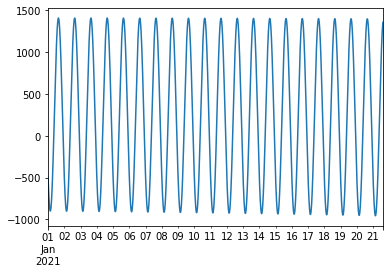

In [18]:
eth.plot()

<AxesSubplot:>

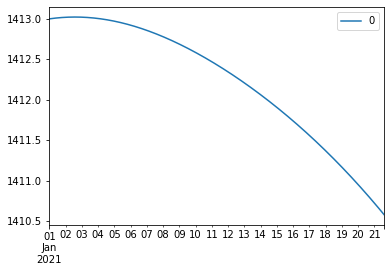

In [19]:
etn.plot()

In [46]:
year = years[2]

In [47]:
year

'2020'

In [48]:
    dfghi = pd.read_pickle(BSRN_path + year +'ghiFLAG.pkl')
    dfghi[kt] = dfghi[sensors]
    dfghi[kt] = dfghi[kt].div(eth.eth.values, axis=0)

    for sensor in sensors:
       print(sensor)
       dfGHI = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])
       oie = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])

       dfGHI['ghi']  = dfghi[sensor]
       dfGHI['flag'] = dfghi['F_'+ sensor]
       dfGHI['kt']   = dfghi['kt_'+ sensor]
       #dfGHI   = dfGHI[(dfGHI.flag == 2) | (dfGHI.flag == 0)]
       dfGHI   = dfGHI[(dfGHI.flag == 0)]

       oie  = dfGHI[(dfGHI['kt']>1) & (dfGHI['kt']<2) ]   
       
       dfstat = oie.describe()
       dfstat.to_csv(BSRN_path + year + sensor + '_statsC1min.csv')

       print(dfstat)
       ghihist = oie.ghi.hist()
       gfigname = figs_path + year + 'GHI_OIEmin_'+ sensor +'.jpeg'
       fig = ghihist.get_figure()
       fig.savefig(gfigname)
       fig.clf()
       khist  = oie.kt.hist()
       kfigname = figs_path + year + 'Kt_OIEmin_' + sensor + '.jpeg'
       fig = khist.get_figure()
       fig.savefig(kfigname)
       fig.clf()

       
       oie.loc[:,'delta'] = oie.index.to_series().diff()/np.timedelta64(1,"m")  #FOR SECONDS MUST CHANGE HERE
       oie.iloc[0,3] = 1.1
       oie.loc[:,'isstart'] = (oie.delta > 1 )
       oie.loc[:,'isend'] = oie.isstart.shift(-1)
       oie.iloc[-1,5] = True

       
       # Table with all OIE - Criteria 1
       
       eventsC1 = pd.DataFrame(columns = ['start', 'end', 'duration', 'ibe', 'min', 'max', 'avg'])     ### WILL NEED KT  TOO IN THIS SUMMARY!!!
       eventsC1['start']    = oie.loc[oie.isstart == True].index
       eventsC1['end']      = oie.loc[oie.isend == True].index
       eventsC1['duration'] = eventsC1.end  - eventsC1.start
       eventsC1['ibe']      = eventsC1.start - eventsC1.start.shift(+1)
       df1 = eventsC1.loc[:,'start': 'end']
       df2 = pd.DataFrame(columns = ['ghi'])
       df2['ghi']  = oie['ghi']
       df1['list'] = df1.apply(lambda x : pd.date_range(start =x['start'],end=x['end'],freq='min').tolist(),axis=1)  ###  FOR SECONDS MUST CHANGE HERE
       df1 = df1['list'].apply(pd.Series).stack().to_frame().rename(columns={0:'Date'})
       df1['value'] = df1.Date.map(df2.ghi)
       avg = df1.groupby(level=0).mean()
       min = df1.groupby(level=0).min()
       max = df1.groupby(level=0).max()
       eventsC1['avg'] = avg['value']
       eventsC1['min'] = min['value']
       eventsC1['max'] = max['value']
       eventsC1.to_csv(BSRN_path + year + sensor + '_OIEC1min2.csv')

       eventsC1 = {}
       df1 = {}
       df2 = {}
       
       

ValueError: Unable to coerce to Series, length must be 527040: given 29666

In [55]:
sensor = sensors[1]

In [56]:
    dfghi = pd.read_pickle(BSRN_path + year +'ghiFLAG.pkl')
    etn   = pd.read_pickle(BSRN_path + year + 'ETH.pkl')
    solpos   = pd.read_pickle(BSRN_path + year + 'solpos.pkl')
    cosSZA = np.cos(np.deg2rad(solpos.zenith)).to_frame()
    
    eth = pd.DataFrame(columns = ['eth'])
    eth['eth'] = etn[0]*cosSZA.zenith
    dfghi[kt] = dfghi[sensors]
    dfghi[kt] = dfghi[kt].div(eth.eth.values, axis=0)
   
    dfGHI = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])
    oie = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])

    dfGHI['ghi']  = dfghi[sensor]
    dfGHI['flag'] = dfghi['F_'+ sensor]
    dfGHI['kt']   = dfghi['kt_'+ sensor]
    dfGHI   = dfGHI[(dfGHI.flag == 2) | (dfGHI.flag == 0)]

    oie  = dfGHI[dfGHI['kt']>1]   
       
    

In [61]:
oie[oie['kt']==oie['kt'].max()]

,ghi,flag,kt,delta,isstart,isend
2020-07-10 10:08:00+00:00,4.695,0,345.362084,NaN,NaN,NaN


In [69]:
oie.loc['2020-07-10':'2020-07-']


2020-07-10 10:08:00+00:00    4.695000
2020-07-10 10:09:00+00:00    5.073333
2020-07-12 10:08:00+00:00    3.750000
Name: ghi, dtype: float64

<AxesSubplot:>

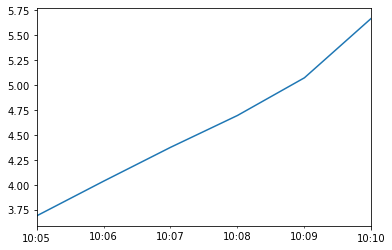

In [72]:
dfGHI.ghi.loc['2020-07-10 10:05:00+00:00':'2020-07-10 10:10:00+00:00'].plot()

<AxesSubplot:>

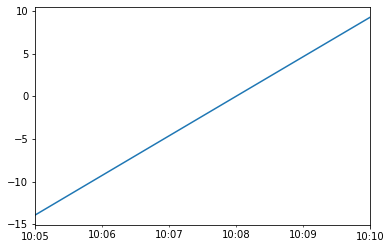

In [74]:
eth.eth.loc['2020-07-10 10:08:00+00:00':'2020-07-10 10:10:00+00:00']

In [75]:
eth.loc['2020-07-10 10:08:00+00:00']

eth    0.013594
Name: 2020-07-10 10:08:00+00:00, dtype: float64

In [76]:
dfGHI.loc['2020-07-10 10:08:00+00:00']

ghi             4.695
flag                0
kt         345.362084
delta             NaN
isstart           NaN
isend             NaN
Name: 2020-07-10 10:08:00+00:00, dtype: object

In [77]:
sensor = sensors[2]

In [78]:
sensor

'GHIP_SMP22'

In [80]:
    dfGHI = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])
    oie = pd.DataFrame(columns = ['ghi', 'flag', 'kt','delta', 'isstart', 'isend'])

    dfGHI['ghi']  = dfghi[sensor]
    dfGHI['flag'] = dfghi['F_'+ sensor]
    dfGHI['kt']   = dfghi['kt_'+ sensor]
    dfGHI   = dfGHI[(dfGHI.flag == 2) | (dfGHI.flag == 0)]

    oie  = dfGHI[dfGHI['kt']>1]   
       

In [82]:
oie[oie['kt']==oie['kt'].max()]

,ghi,flag,kt,delta,isstart,isend
2020-07-04 20:28:00+00:00,7.20678,0,3357.426173,NaN,NaN,NaN


In [83]:
dfGHI.loc['2020-07-04 20:28:00+00:00']

ghi            7.20678
flag                 0
kt         3357.426173
delta              NaN
isstart            NaN
isend              NaN
Name: 2020-07-04 20:28:00+00:00, dtype: object

In [84]:
eth.loc['2020-07-04 20:28:00+00:00']

eth    0.002147
Name: 2020-07-04 20:28:00+00:00, dtype: float64

<AxesSubplot:>

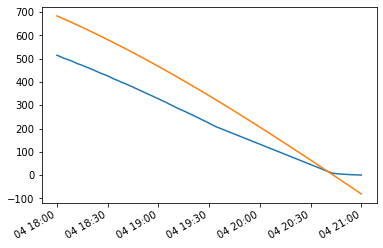

In [93]:
dfGHI.ghi.loc['2020-08-04 18:00:00+00:00':'2020-08-04 21:00:00+00:00'].plot()
eth.eth.loc['2020-08-04 18:00:00+00:00':'2020-08-04 21:00:00+00:00'].plot()

In [94]:
oie

,ghi,flag,kt,delta,isstart,isend
2020-01-01 12:40:00+00:00,1264.583333,0,1.101550,NaN,NaN,NaN
2020-01-01 12:41:00+00:00,1218.783333,0,1.058723,NaN,NaN,NaN
2020-01-01 13:10:00+00:00,1238.616667,0,1.002353,NaN,NaN,NaN
2020-01-01 13:19:00+00:00,1278.383333,0,1.015549,NaN,NaN,NaN
2020-01-02 08:27:00+00:00,5.908333,0,4.324063,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-31 08:27:00+00:00,14.191667,0,2.551299,NaN,NaN,NaN
2020-12-31 08:28:00+00:00,16.248333,0,1.550570,NaN,NaN,NaN
2020-12-31 08:29:00+00:00,18.913333,0,1.228138,NaN,NaN,NaN
2020-12-31 08:30:00+00:00,21.295000,0,1.047691,NaN,NaN,NaN


<AxesSubplot:>

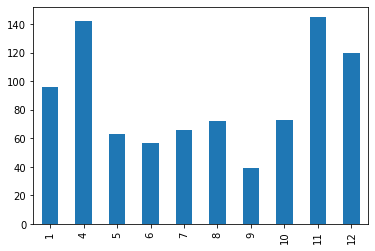

In [97]:
oie.ghi.groupby(oie.index.month).count().plot(kind="bar")


In [98]:
oie

1      96
4     142
5      63
6      57
7      66
8      72
9      39
10     73
11    145
12    120
Name: ghi, dtype: int64

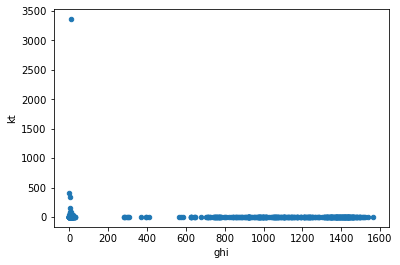

In [99]:
scat = oie.plot.scatter(x = 'ghi', y = 'kt') 

In [101]:
oie.kt.max()

3357.426172624975

In [103]:
       oie.loc[:,'delta'] = oie.index.to_series().diff()/np.timedelta64(1,"m")  #FOR SECONDS MUST CHANGE HERE
       oie.iloc[0,3] = 1.1
       oie.loc[:,'isstart'] = (oie.delta > 1 )
       oie.loc[:,'isend'] = oie.isstart.shift(-1)
       oie.iloc[-1,5] = True



       eventsC1 = pd.DataFrame(columns = ['start', 'end', 'duration', 'ibe', 'min', 'max', 'avg'])     ### WILL NEED KT  TOO IN THIS SUMMARY!!!
       eventsC1['start']    = oie.loc[oie.isstart == True].index
       eventsC1['end']      = oie.loc[oie.isend == True].index
       eventsC1['duration'] = eventsC1.end  - eventsC1.start
       eventsC1['ibe']      = eventsC1.start - eventsC1.start.shift(+1)
       df1 = eventsC1.loc[:,'start': 'end']
       df2 = pd.DataFrame(columns = ['ghi'])
       df2['ghi']  = oie['ghi']
       df1['list'] = df1.apply(lambda x : pd.date_range(start =x['start'],end=x['end'],freq='min').tolist(),axis=1)  ###  FOR SECONDS MUST CHANGE HERE
       df1 = df1['list'].apply(pd.Series).stack().to_frame().rename(columns={0:'Date'})
       df1['value'] = df1.Date.map(df2.ghi)
       avg = df1.groupby(level=0).mean()
       min = df1.groupby(level=0).min()
       max = df1.groupby(level=0).max()
       eventsC1['avg'] = avg['value']
       eventsC1['min'] = min['value']
       eventsC1['max'] = max['value']
       eventsC1.to_csv(BSRN_path + year + sensor + '_OIEC1min2.csv')

       durhist = eventsC1.max.groupby(oie.duration.minutes).count().plot(kind="bar")
       plt.ylabel('OIE')
       plt.xlabel(year)
       dfigname = figs_path + year + 'durationhist'+ sensor +'.jpeg'

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

AttributeError: 'function' object has no attribute 'groupby'

In [104]:
eventsC1

,start,end,duration,ibe,min,max,avg
0,2020-01-01 12:40:00+00:00,2020-01-01 12:41:00+00:00,0 days 00:01:00,NaT,1218.783333,1264.583333,1241.683333
1,2020-01-01 13:10:00+00:00,2020-01-01 13:10:00+00:00,0 days 00:00:00,0 days 00:30:00,1238.616667,1238.616667,1238.616667
2,2020-01-01 13:19:00+00:00,2020-01-01 13:19:00+00:00,0 days 00:00:00,0 days 00:09:00,1278.383333,1278.383333,1278.383333
3,2020-01-02 08:27:00+00:00,2020-01-02 08:27:00+00:00,0 days 00:00:00,0 days 19:08:00,5.908333,5.908333,5.908333
4,2020-01-02 22:07:00+00:00,2020-01-02 22:08:00+00:00,0 days 00:01:00,0 days 13:40:00,7.293220,7.855000,7.574110
...,...,...,...,...,...,...,...
564,2020-12-29 12:51:00+00:00,2020-12-29 12:51:00+00:00,0 days 00:00:00,0 days 04:26:00,1215.150000,1215.150000,1215.150000
565,2020-12-30 08:26:00+00:00,2020-12-30 08:27:00+00:00,0 days 00:01:00,0 days 19:35:00,8.291667,8.983333,8.637500
566,2020-12-30 22:07:00+00:00,2020-12-30 22:07:00+00:00,0 days 00:00:00,0 days 13:41:00,4.236667,4.236667,4.236667
567,2020-12-31 08:26:00+00:00,2020-12-31 08:30:00+00:00,0 days 00:04:00,0 days 10:19:00,12.913333,21.295000,16.712333


In [111]:
eventsC1['max'].groupby(eventsC1.duration).count()

duration
0 days 00:00:00    344
0 days 00:01:00    178
0 days 00:02:00     29
0 days 00:03:00      8
0 days 00:04:00      6
0 days 00:05:00      4
Name: max, dtype: int64

In [108]:
eventsC1.dtypes

start       datetime64[ns, Etc/GMT]
end         datetime64[ns, Etc/GMT]
duration            timedelta64[ns]
ibe                 timedelta64[ns]
min                         float64
max                         float64
avg                         float64
dtype: object

In [126]:
eventsC1['duration'].groupby(eventsC1.duration).count()

duration
0    344
1    178
2     29
3      8
4      6
5      4
Name: duration, dtype: int64

duration
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

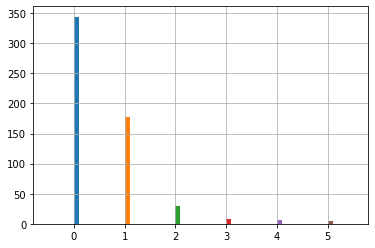

In [128]:
eventsC1['duration'].groupby(eventsC1.duration).hist()

<AxesSubplot:>

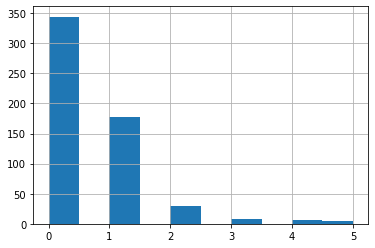

In [129]:
eventsC1['duration'].hist()

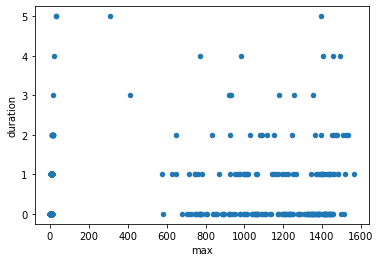

In [125]:
scat = eventsC1.plot.scatter(x = 'max', y = 'duration') 

In [118]:
eventsC1['duration'].dt.minutes


AttributeError: 'TimedeltaProperties' object has no attribute 'minutes'

In [123]:
eventsC1['duration']  =(eventsC1['duration'] / np.timedelta64(1, 'm')).astype(int)

In [130]:
eventsC1

,start,end,duration,ibe,min,max,avg
0,2020-01-01 12:40:00+00:00,2020-01-01 12:41:00+00:00,1,NaT,1218.783333,1264.583333,1241.683333
1,2020-01-01 13:10:00+00:00,2020-01-01 13:10:00+00:00,0,0 days 00:30:00,1238.616667,1238.616667,1238.616667
2,2020-01-01 13:19:00+00:00,2020-01-01 13:19:00+00:00,0,0 days 00:09:00,1278.383333,1278.383333,1278.383333
3,2020-01-02 08:27:00+00:00,2020-01-02 08:27:00+00:00,0,0 days 19:08:00,5.908333,5.908333,5.908333
4,2020-01-02 22:07:00+00:00,2020-01-02 22:08:00+00:00,1,0 days 13:40:00,7.293220,7.855000,7.574110
...,...,...,...,...,...,...,...
564,2020-12-29 12:51:00+00:00,2020-12-29 12:51:00+00:00,0,0 days 04:26:00,1215.150000,1215.150000,1215.150000
565,2020-12-30 08:26:00+00:00,2020-12-30 08:27:00+00:00,1,0 days 19:35:00,8.291667,8.983333,8.637500
566,2020-12-30 22:07:00+00:00,2020-12-30 22:07:00+00:00,0,0 days 13:41:00,4.236667,4.236667,4.236667
567,2020-12-31 08:26:00+00:00,2020-12-31 08:30:00+00:00,4,0 days 10:19:00,12.913333,21.295000,16.712333


In [159]:
eventsC1 = eventsC1.set_index('start')


In [167]:
eventsC1.head(20)

,end,duration,ibe,min,max,avg
start,,,,,,
2020-01-01 12:40:00+00:00,2020-01-01 12:41:00+00:00,1,NaT,1218.783333,1264.583333,1241.683333
2020-01-01 13:10:00+00:00,2020-01-01 13:10:00+00:00,0,0 days 00:30:00,1238.616667,1238.616667,1238.616667
2020-01-01 13:19:00+00:00,2020-01-01 13:19:00+00:00,0,0 days 00:09:00,1278.383333,1278.383333,1278.383333
2020-01-02 08:27:00+00:00,2020-01-02 08:27:00+00:00,0,0 days 19:08:00,5.908333,5.908333,5.908333
2020-01-02 22:07:00+00:00,2020-01-02 22:08:00+00:00,1,0 days 13:40:00,7.293220,7.855000,7.574110
2020-01-03 08:28:00+00:00,2020-01-03 08:28:00+00:00,0,0 days 10:21:00,7.048333,7.048333,7.048333
2020-01-03 18:09:00+00:00,2020-01-03 18:10:00+00:00,1,0 days 09:41:00,1132.816667,1194.183333,1163.500000
2020-01-03 22:08:00+00:00,2020-01-03 22:08:00+00:00,0,0 days 03:59:00,3.671667,3.671667,3.671667
2020-01-04 08:29:00+00:00,2020-01-04 08:31:00+00:00,2,0 days 10:21:00,15.171667,16.533333,15.922778


In [174]:
# Import data
x1 = eventsC1.loc['2020-01', 'duration']
x2 = eventsC1.loc['2020-02', 'duration']
x3 = eventsC1.loc['2020-03', 'duration']
x4 = eventsC1.loc['2020-04', 'duration']
x5 = eventsC1.loc['2020-05', 'duration']
x6 = eventsC1.loc['2020-06', 'duration']
x7 = eventsC1.loc['2020-07', 'duration']
x8 = eventsC1.loc['2020-08', 'duration']
x9 = eventsC1.loc['2020-09', 'duration']
x10 = eventsC1.loc['2020-10', 'duration']
x11 = eventsC1.loc['2020-11', 'duration']
x12 = eventsC1.loc['2020-12', 'duration']

x1

start
2020-01-01 12:40:00+00:00    1
2020-01-01 13:10:00+00:00    0
2020-01-01 13:19:00+00:00    0
2020-01-02 08:27:00+00:00    0
2020-01-02 22:07:00+00:00    1
                            ..
2020-01-21 14:30:00+00:00    0
2020-01-21 14:44:00+00:00    0
2020-01-21 16:55:00+00:00    0
2020-01-21 22:08:00+00:00    0
2020-01-23 08:43:00+00:00    0
Name: duration, Length: 61, dtype: int64

In [171]:
x1 = eventsC1.loc['2020-01',:]



In [172]:
x1

,end,duration,ibe,min,max,avg
start,,,,,,
2020-01-01 12:40:00+00:00,2020-01-01 12:41:00+00:00,1,NaT,1218.783333,1264.583333,1241.683333
2020-01-01 13:10:00+00:00,2020-01-01 13:10:00+00:00,0,0 days 00:30:00,1238.616667,1238.616667,1238.616667
2020-01-01 13:19:00+00:00,2020-01-01 13:19:00+00:00,0,0 days 00:09:00,1278.383333,1278.383333,1278.383333
2020-01-02 08:27:00+00:00,2020-01-02 08:27:00+00:00,0,0 days 19:08:00,5.908333,5.908333,5.908333
2020-01-02 22:07:00+00:00,2020-01-02 22:08:00+00:00,1,0 days 13:40:00,7.293220,7.855000,7.574110
...,...,...,...,...,...,...
2020-01-21 14:30:00+00:00,2020-01-21 14:30:00+00:00,0,0 days 00:07:00,1444.338983,1444.338983,1444.338983
2020-01-21 14:44:00+00:00,2020-01-21 14:44:00+00:00,0,0 days 00:14:00,1403.152542,1403.152542,1403.152542
2020-01-21 16:55:00+00:00,2020-01-21 16:55:00+00:00,0,0 days 02:11:00,1326.881356,1326.881356,1326.881356


(array([54.,  0., 15.,  0.,  0.,  6.,  0.,  2.,  0.,  2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

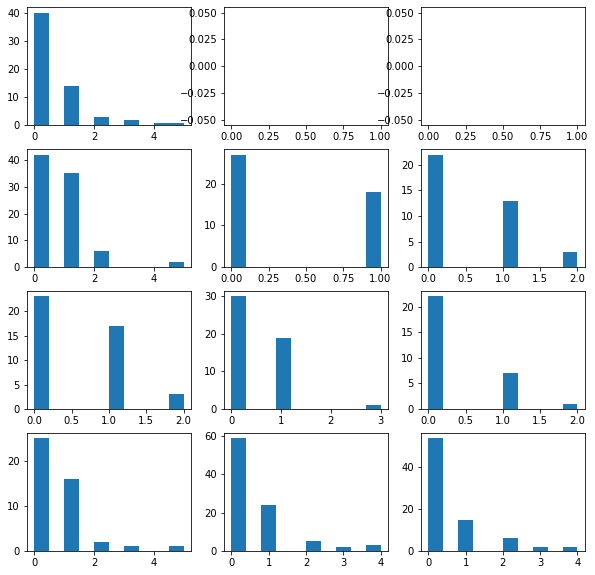

In [195]:
import seaborn as sns 
# plot
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8),(ax9, ax10, ax11)) = plt.subplots(4, 3, figsize =(10,10))

ax0.hist(x1)
ax1.hist(x2)
ax2.hist(x3)
ax3.hist(x4)
ax4.hist(x5)
ax5.hist(x6)
ax6.hist(x7)
ax7.hist(x8)
ax8.hist(x9)
ax9.hist(x10)
ax10.hist(x11)
ax11.hist(x12)

(array([40.,  0., 14.,  0.,  3.,  0.,  2.,  0.,  1.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

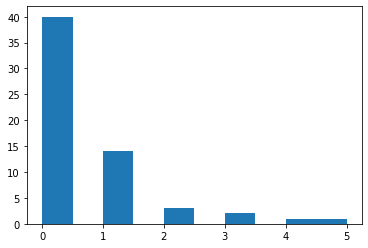

In [184]:
plt.hist(x1)


(array([54.,  0., 15.,  0.,  0.,  6.,  0.,  2.,  0.,  2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

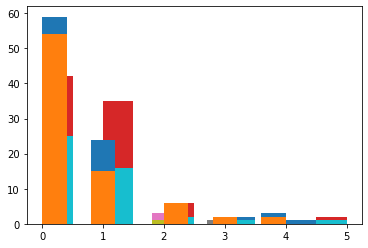

In [187]:
plt.hist(x1)
plt.hist(x2)
plt.hist(x3)
plt.hist(x4)
plt.hist(x5)
plt.hist(x6)
plt.hist(x7)
plt.hist(x8)
plt.hist(x9)
plt.hist(x10)
plt.hist(x11)
plt.hist(x12)

In [188]:
y1 = eventsC1.loc['2020-01', 'avg']
y2 = eventsC1.loc['2020-02', 'avg']
y3 = eventsC1.loc['2020-03', 'avg']
y4 = eventsC1.loc['2020-04', 'avg']
y5 = eventsC1.loc['2020-05', 'avg']
y6 = eventsC1.loc['2020-06', 'avg']
y7 = eventsC1.loc['2020-07', 'avg']
y8 = eventsC1.loc['2020-08', 'avg']
y9 = eventsC1.loc['2020-09', 'avg']
y10 = eventsC1.loc['2020-10', 'avg']
y11 = eventsC1.loc['2020-11', 'avg']
y12 = eventsC1.loc['2020-12', 'avg']

(array([32.,  0.,  0.,  0.,  1.,  0.,  3., 11., 12., 20.]),
 array([-1.22666667e+00,  1.48880167e+02,  2.98987000e+02,  4.49093833e+02,
         5.99200667e+02,  7.49307500e+02,  8.99414333e+02,  1.04952117e+03,
         1.19962800e+03,  1.34973483e+03,  1.49984167e+03]),
 <BarContainer object of 10 artists>)

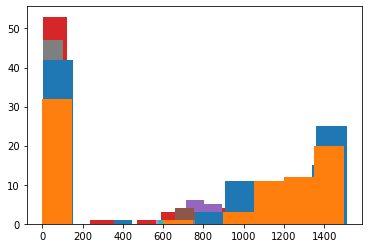

In [189]:
plt.hist(y1)
plt.hist(y2)
plt.hist(y3)
plt.hist(y4)
plt.hist(y5)
plt.hist(y6)
plt.hist(y7)
plt.hist(y8)
plt.hist(y9)
plt.hist(y10)
plt.hist(y11)
plt.hist(y12)

(array([32.,  0.,  0.,  0.,  1.,  0.,  3., 11., 12., 20.]),
 array([-1.22666667e+00,  1.48880167e+02,  2.98987000e+02,  4.49093833e+02,
         5.99200667e+02,  7.49307500e+02,  8.99414333e+02,  1.04952117e+03,
         1.19962800e+03,  1.34973483e+03,  1.49984167e+03]),
 <BarContainer object of 10 artists>)

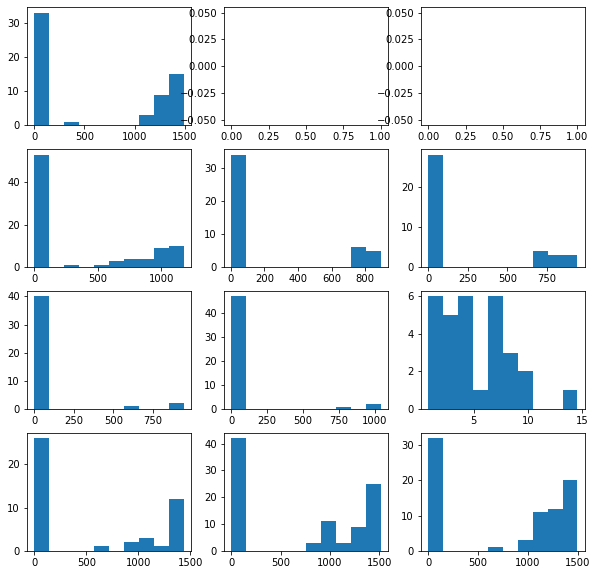

In [196]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8),(ax9, ax10, ax11)) = plt.subplots(4, 3, figsize =(10,10))

ax0.hist(y1)
ax1.hist(y2)
ax2.hist(y3)
ax3.hist(y4)
ax4.hist(y5)
ax5.hist(y6)
ax6.hist(y7)
ax7.hist(y8)
ax8.hist(y9)
ax9.hist(y10)
ax10.hist(y11)
ax11.hist(y12)

In [139]:
x1

,duration
